# CMS Survey – 2021 Supplement

[data user guide](https://www.cms.gov/files/document/2021mcbscovidpufdugwinter.pdf)<br/>
[data dictionary](https://www.cms.gov/files/document/covidpuf32021wtxt.txt)

---



In [1]:
import pandas as pd
import numpy as np
import imblearn.over_sampling
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_style("whitegrid")
%matplotlib inline


In [2]:
raw_df = pd.read_csv('/Users/sandraparedes/Documents/GitHub/metis_dsml/03_business/business-project/COVIDPUF_3_2021W.csv')


/var/folders/9q/517kb3kd6rz7pq25y7fyk9w00000gn/T/ipykernel_8949/1552268147.py:1: DtypeWarning: Columns (13,18,26,27,33,34,35,36,37,39,40,41,42,45,46,47,48,50,51,52,53,55,56,57,58,59,60,63,64,69,70,72,73,74,75,76,77,79,82,84,86,87,89,90,91,92,93,94,96,97,99,100,101,102,103,104,106,107,108,109,110,111,121,125,128,131,138,141,144,145,151,169,175,178,179,180,181,182,183,184,195,197,199,200,227,260,261,272,273,275,276,279,285,286,288) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('/Users/sandraparedes/Documents/GitHub/metis_dsml/03_business/business-project/COVIDPUF_3_2021W.csv')


In [ ]:
raw_df.head()

In [ ]:
raw_df.describe()

In [ ]:
raw_df.info()

In [ ]:
raw_df.columns

In [ ]:
raw_df.iloc[:, 3:17:].head()

`INV_LANG`           
LANG                          Language interview conducted in          
                              10,546                  1  English                                                                    
                                 561                  2  Spanish                                                                                  
 
`DMV_AGECAT`         
AGECAT                        Age group                                
                               1,771                  1  < 65 years                                                                 
                               3,972                  2  65-74 years                                                                
                               5,364                  3  75+ years                                                                  
 
`DMV_SEX`            
SEXF                          Gender                                   
                               5,019                  1  Male                                                                       
                               6,088                  2  Female                                                      

In [ ]:
raw_df.iloc[:, 19:27:].head()

`ACV_TELMED`         
YESNODK                       PCP offers telehealth appointments       
                               2,294                  D  Don't know                                                                 
                                 506                  .  Inapplicable/Missing                                                       
                                   1                  R  Refused                                                                    
                               6,491                  1  Yes                                                                        
                               1,815                  2  No                                                                         
         Notes:  Applies only if ACV_PLACPART = 1.
                 First available in 2020
 
`ACV_TELMEDT1`       
TELEVID                       Type of telehealth offered               
                                 769                  D  Don't know                                                                 
                               4,616                  .  Inapplicable/Missing                                                       
                                   4                  R  Refused                                                                    
                               1,339                  1  Telephone                                                                  
                                 415                  2  Video                                                                      
                               3,964                  3  Both                                                                       
         Notes:  Applies only if ACV_TELMED = 1.
                 First available in 2020
 
`ACV_TELMEDDU`       
YESNODK                       SP offered telehealth since 11/1/20      
                                 147                  D  Don't know                                                                 
                               4,616                  .  Inapplicable/Missing                                                       
                                   1                  R  Refused                                                                    
                               3,183                  1  Yes                                                                        
                               3,160                  2  No                                                                         
         Notes:  Applies only if ACV_TELMED = 1.
                 First available in 2020
 
 
`ACV_TELMEDUS`       
YESNODK                       SP had telehealth visit since 11/1/20    
                                  60                  D  Don't know                                                                 
                               4,616                  .  Inapplicable/Missing                                                       
                                   1                  R  Refused                                                                    
                               2,948                  1  Yes                                                                        
                               3,482                  2  No                                                                         
         Notes:  Applies only if ACV_TELMED = 1.
                 First available in Fall 2020 COVID round.
 
`ACV_TELMEDT4`       
TELEVID                       Type of telehealth visit had 11/1/20     
                                   6                  D  Don't know                                                                 
                               8,159                  .  Inapplicable/Missing                                                       
                               1,620                  1  Telephone                                                                  
                                 825                  2  Video                                                                      
                                 497                  3  Both                                                                       
         Notes:  Applies only if ACV_TELMEDUS = 1.
                 First available in Fall 2020 COVID round.

In [ ]:
raw_df.iloc[:, 28:32:].head()

`ACV_COMPDESK`      
YESNODK   COMPUTER            Own computer                             
                                  26                  D  Don't know                                                                 
                                   4                  R  Refused                                                                    
                               6,786                  1  Yes                                                                        
                               4,291                  2  No                                                                         
                 First available in 2020
 
`ACV_COMPPHON`       
YESNODK   COMPUTER            Own smartphone                           
                                 117                  D  Don't know                                                                 
                                   4                  R  Refused                                                                    
                               7,164                  1  Yes                                                                        
                               3,822                  2  No                                                                         
                 First available in 2020
 
`ACV_COMPTAB`        
YESNODK   COMPUTER            Own tablet                               
                                  21                  D  Don't know                                                                 
                                   6                  R  Refused                                                                    
                               4,574                  1  Yes                                                                        
                               6,506                  2  No                                                                         
                 First available in 2020
 
`ACV_INTERNET`       
YESNODK                       Access to Internet                       
                                  47                  D  Don't know                                                                 
                                   3                  R  Refused                                                                    
                               8,866                  1  Yes                                                                        
                               2,191                  2  No                                                                         
                 First available in 2020
 
`ACV_AUDIOVID`
YESNODK                       Use video or voice calls                 
                                  44                  D  Don't know                                                                 
                                   3                  R  Refused                                                                    
                               4,977                  1  Yes                                                                        
                               6,083                  2  No                                                                         
                 First available in 2020
 
`ACV_COVIDCAR`       
YESNODK                       Unable to get care bc of CV19 since 11/1 <br/>
                                  51                  D  Don't know                                                                 
                                   3                  R  Refused                                                                    
                                 680                  1  Yes                                                                        
                              10,373                  2  No                                                                         
                 First available in 2020

In [93]:
# select demographics, telemed experience, and technology questions
sub_df = raw_df[['INV_LANG', 
            'DMV_AGECAT', 
            'DMV_SEX', 
            'ACV_TELMED', 
            'ACV_TELMEDT1',
            'ACV_TELMEDDU', 
            'ACV_TELMEDUS', 
            'ACV_TELMEDT4', 
            'ACV_COMPPHON', 
            'ACV_COMPTAB', 
            'ACV_INTERNET', 
            'ACV_AUDIOVID']]
sub_df.head()

,INV_LANG,DMV_AGECAT,DMV_SEX,ACV_TELMED,ACV_TELMEDT1,ACV_TELMEDDU,ACV_TELMEDUS,ACV_TELMEDT4,ACV_COMPPHON,ACV_COMPTAB,ACV_INTERNET,ACV_AUDIOVID
0,1,3,2,2,NaN,NaN,NaN,NaN,2,2,2,2
1,1,1,1,1,2,1,1,2,1,1,1,1
2,2,1,1,1,1,1,1,1,1,2,2,1
3,1,3,2,1,3,2,1,1,1,1,1,1
4,1,3,2,1,3,2,1,3,1,1,1,2


In [92]:
sub_df.isnull().sum()

INV_LANG           0
DMV_AGECAT         0
DMV_SEX            0
ACV_TELMED       506
ACV_TELMEDT1    4616
ACV_TELMEDDU    4616
ACV_TELMEDUS    4616
ACV_TELMEDT4    8159
ACV_COMPPHON       0
ACV_COMPTAB        0
ACV_INTERNET       0
ACV_AUDIOVID       0
dtype: int64

In [81]:
# respondents who gave the interview in Spanish
span_df = sub_df.query('INV_LANG == 1')
span_df.head()

,INV_LANG,DMV_AGECAT,DMV_SEX,ACV_TELMED,ACV_TELMEDT1,ACV_TELMEDDU,ACV_TELMEDUS,ACV_TELMEDT4,ACV_COMPPHON,ACV_COMPTAB,ACV_INTERNET,ACV_AUDIOVID
0,1,3,2,2,NaN,NaN,NaN,NaN,2,2,2,2
1,1,1,1,1,2,1,1,2,1,1,1,1
3,1,3,2,1,3,2,1,1,1,1,1,1
4,1,3,2,1,3,2,1,3,1,1,1,2
5,1,3,2,D,NaN,NaN,NaN,NaN,2,1,2,2


In [89]:
# respondents who gave the interview in Spanish & had telehealth visit since 11/1/20
tele_span_df = sub_df[(sub_df['INV_LANG'] == 2) & (sub_df['ACV_TELMEDUS'] == '1')]
tele_span_df

,INV_LANG,DMV_AGECAT,DMV_SEX,ACV_TELMED,ACV_TELMEDT1,ACV_TELMEDDU,ACV_TELMEDUS,ACV_TELMEDT4,ACV_COMPPHON,ACV_COMPTAB,ACV_INTERNET,ACV_AUDIOVID
2,2,1,1,1,1,1,1,1,1,2,2,1
85,2,1,2,1,3,2,1,3,1,2,2,1
109,2,3,2,1,3,1,1,3,1,2,1,2
165,2,3,2,1,3,2,1,2,2,1,1,1
185,2,2,2,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10969,2,2,2,1,1,2,1,1.0,1,2,1,2
11048,2,3,2,1,1,2,1,1.0,2,2,2,2
11053,2,3,2,1,3,1,1,3.0,2,2,2,1
11065,2,2,1,1,3,1,1,2.0,1,2,1,1


In [82]:
tele_span_df.isnull().sum()


INV_LANG        0
DMV_AGECAT      0
DMV_SEX         0
ACV_TELMED      0
ACV_TELMEDT1    0
ACV_TELMEDDU    0
ACV_TELMEDUS    0
ACV_TELMEDT4    0
ACV_COMPPHON    0
ACV_COMPTAB     0
ACV_INTERNET    0
ACV_AUDIOVID    0
dtype: int64

<AxesSubplot:>

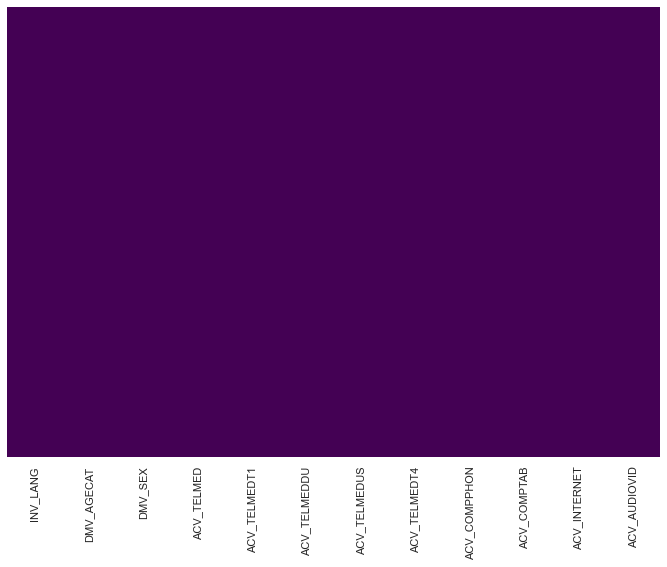

In [88]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tele_span_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [86]:
# sns.pairplot(tele_span_df, height=5, aspect=1.5);